In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, timedelta
import itertools
import os
from pathlib import Path
from typing import List
os.environ["OMP_NUM_THREADS"] = "4"

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### Data reading

In [3]:


def aggregate_results(dataset_names: List[str], model_names: List[str], verbose: bool = True) -> None:
    """
    Aggregate results from experiment files and save to agg_results.csv
    
    Args:
        dataset_names: List of dataset names (e.g., ['coop', 'tafeng'])
        model_names: List of model names to process
        verbose: Whether to print progress information
    """
    
    # Initialize lists to store results
    results = []
    
    # Get the current working directory (where the notebook is)
    base_dir = Path.cwd()
    
    # Metrics to aggregate
    metrics = ['f1_score', 'precision', 'recall', 'hit_score']
    
    for dataset in dataset_names:
        if verbose:
            print(f"\nProcessing dataset: {dataset}")
            
        dataset_path = base_dir / 'forgotten' / dataset
        if not dataset_path.exists():
            if verbose:
                print(f"Dataset directory not found: {dataset_path}")
            continue
            
        for model in model_names:
            if verbose:
                print(f"\n  Processing model: {model}")
                
            model_path = dataset_path / model
            if not model_path.exists():
                if verbose:
                    print(f"  Model directory not found: {model_path}")
                continue
                
            # Process each split (10 to 90)
            for split in range(10, 100, 10):
                if verbose:
                    print(f"    Processing split: {split}")
                    
                split_path = model_path / f'split_{split}'
                if not split_path.exists():
                    if verbose:
                        print(f"    Split directory not found: {split_path}")
                    continue
                    
                # Process each day folder (0, 1, 2)
                for day in range(3):
                    if verbose:
                        print(f"      Processing day: {day}")
                        
                    day_path = split_path / str(day)
                    if not day_path.exists():
                        if verbose:
                            print(f"      Day directory not found: {day_path}")
                        continue
                    
                    # Handle the 'last' model differently since it doesn't have pred_length
                    if model == 'last':
                        file_name = f'pred_forgot_{split}_last_{day}_days.csv'
                        file_path = day_path / file_name
                        
                        if not file_path.exists():
                            if verbose:
                                print(f"        File not found: {file_name}")
                            continue
                            
                        try:
                            if verbose:
                                print(f"        Reading: {file_name}")
                                
                            # Read the CSV file
                            df = pd.read_csv(file_path)
                            
                            # Calculate averages for the metrics
                            avg_metrics = {
                                'model_name': model,
                                'split_type': split,
                                'max_days': day,
                                'pred_length': None,  # No pred_length for 'last' model
                            }
                            
                            # Add average for each metric
                            for metric in metrics:
                                avg_metrics[f'avg_{metric}'] = df[metric].mean()
                                
                            results.append(avg_metrics)
                            
                        except Exception as e:
                            if verbose:
                                print(f"        Error processing {file_name}: {str(e)}")
                            continue
                            
                    else:
                        # Process each prediction length (2 to 20) for other models
                        for pred_length in range(2, 21):
                            file_name = f'pred_forgot_{split}_{model}_{day}_days_{pred_length}.csv'
                            file_path = day_path / file_name
                            
                            if not file_path.exists():
                                if verbose:
                                    print(f"        File not found: {file_name}")
                                continue
                                
                            try:
                                if verbose:
                                    print(f"        Reading: {file_name}")
                                    
                                # Read the CSV file
                                df = pd.read_csv(file_path)
                                
                                # Calculate averages for the metrics
                                avg_metrics = {
                                    'model_name': model,
                                    'split_type': split,
                                    'max_days': day,
                                    'pred_length': pred_length
                                }
                                
                                # Add average for each metric
                                for metric in metrics:
                                    avg_metrics[f'avg_{metric}'] = df[metric].mean()
                                    
                                results.append(avg_metrics)
                                
                            except Exception as e:
                                if verbose:
                                    print(f"        Error processing {file_name}: {str(e)}")
                                continue
    
    # Create the final DataFrame
    if results:
        final_df = pd.DataFrame(results)
        
        # Save to CSV
        output_path = base_dir / 'agg_results_fbp_coop.csv'
        final_df.to_csv(output_path, index=False)
        
        if verbose:
            print(f"\nResults successfully saved to: {output_path}")
            print(f"Total aggregated results: {len(results)}")
    else:
        print("No results were found to aggregate.")

# Example usage:
dataset_names = ['coop']
model_names = ['top', 'last', 'markov', 'ibp', 'nmf', 'fpmc', 'clf', 'hrm', 'tbp', 'xmt', 'tars_xmt_final_sum']
# model_names = ['top', 'last', 'markov', 'ibp', 'nmf', 'fpmc', 'clf', 'hrm', 'tbp']
# aggregate_results(dataset_names, model_names, verbose=True)

In [4]:
def aggregate_results(dataset_names: List[str], model_names: List[str], verbose: bool = True) -> None:
    """
    Aggregate results from experiment files and save to agg_results.csv
    
    Args:
        dataset_names: List of dataset names (e.g., ['coop', 'tafeng'])
        model_names: List of model names to process
        verbose: Whether to print progress information
    """
    
    # Initialize lists to store results
    results = []
    
    # Get the current working directory (where the notebook is)
    base_dir = Path.cwd()
    
    # Metrics to aggregate
    metrics = ['f1_score', 'precision', 'recall', 'hit_score']
    
    for dataset in dataset_names:
        if verbose:
            print(f"\nProcessing dataset: {dataset}")
            
        dataset_path = base_dir / 'forgotten' / dataset
        if not dataset_path.exists():
            if verbose:
                print(f"Dataset directory not found: {dataset_path}")
            continue
            
        for model in model_names:
            if verbose:
                print(f"\n  Processing model: {model}")
                
            model_path = dataset_path / model
            if not model_path.exists():
                if verbose:
                    print(f"  Model directory not found: {model_path}")
                continue
                
            # Process each split (10 to 90)
            for split in range(10, 100, 10):
                if verbose:
                    print(f"    Processing split: {split}")
                    
                split_path = model_path / f'split_{split}'
                if not split_path.exists():
                    if verbose:
                        print(f"    Split directory not found: {split_path}")
                    continue
                    
                # Process each day folder (0, 1, 2)
                for day in range(3):
                    if verbose:
                        print(f"      Processing day: {day}")
                        
                    day_path = split_path / str(day)
                    if not day_path.exists():
                        if verbose:
                            print(f"      Day directory not found: {day_path}")
                        continue
                    
                    # Handle the 'last' model
                    if model == 'last':
                        file_name = f'pred_forgot_{split}_last_{day}_days.csv'
                        file_path = day_path / file_name
                        
                        if not file_path.exists():
                            if verbose:
                                print(f"        File not found: {file_name}")
                            continue
                            
                        try:
                            if verbose:
                                print(f"        Reading: {file_name}")
                                
                            # Read the CSV file
                            df = pd.read_csv(file_path)
                            
                            # Calculate the base metrics
                            base_metrics = {
                                'model_name': model,
                                'split_type': split,
                                'max_days': day,
                            }
                            
                            # Add average for each metric
                            for metric in metrics:
                                base_metrics[f'avg_{metric}'] = df[metric].mean()
                            
                            # Create entries for each prediction length (2 to 20)
                            for pred_length in range(2, 21):
                                # Create a copy of the base metrics and add pred_length
                                metrics_entry = base_metrics.copy()
                                metrics_entry['pred_length'] = pred_length
                                results.append(metrics_entry)
                                
                        except Exception as e:
                            if verbose:
                                print(f"        Error processing {file_name}: {str(e)}")
                            continue
                            
                    else:
                        # Process each prediction length (2 to 20) for other models
                        for pred_length in range(2, 21):
                            file_name = f'pred_forgot_{split}_{model}_{day}_days_{pred_length}.csv'
                            file_path = day_path / file_name
                            
                            if not file_path.exists():
                                if verbose:
                                    print(f"        File not found: {file_name}")
                                continue
                                
                            try:
                                if verbose:
                                    print(f"        Reading: {file_name}")
                                    
                                # Read the CSV file
                                df = pd.read_csv(file_path)
                                
                                # Calculate averages for the metrics
                                avg_metrics = {
                                    'model_name': model,
                                    'split_type': split,
                                    'max_days': day,
                                    'pred_length': pred_length
                                }
                                
                                # Add average for each metric
                                for metric in metrics:
                                    avg_metrics[f'avg_{metric}'] = df[metric].mean()
                                    
                                results.append(avg_metrics)
                                
                            except Exception as e:
                                if verbose:
                                    print(f"        Error processing {file_name}: {str(e)}")
                                continue
    
    # Create the final DataFrame
    if results:
        final_df = pd.DataFrame(results)
        
        # Save to CSV
        output_path = base_dir / 'agg_results_fbp_coop.csv'
        final_df.to_csv(output_path, index=False)
        
        if verbose:
            print(f"\nResults successfully saved to: {output_path}")
            print(f"Total aggregated results: {len(results)}")
    else:
        print("No results were found to aggregate.")

# Example usage:
dataset_names = ['coop']
model_names = ['top', 'last', 'markov', 'ibp', 'nmf', 'fpmc', 'clf', 'hrm', 'tbp', 'xmt', 'tars_xmt_final_sum']
# model_names = ['top', 'last', 'markov', 'ibp', 'nmf', 'fpmc', 'clf', 'hrm', 'tbp']
# aggregate_results(dataset_names, model_names, verbose=True)

### Plotting function

In [5]:
def plot_metrics_by_day(df: pd.DataFrame, 
                     day: int, 
                     metrics: list = None, 
                     metric_labels: list = None, 
                     model_colors: dict = None,
                     label_fontsize: int = 12,
                     title_fontsize: int = 14,
                     legend_fontsize: int = 10,
                     suptitle_fontsize: int = 16,
                     line_alpha: float = 1.0,
                     save_path: str = None):
    """
    Create plots for different metrics across split types for a specific day.
    
    Args:
        df: DataFrame with the aggregated results
        day: Which day to plot (0, 1, or 2)
        metrics: List of metric column names to plot (e.g., ['avg_f1_score', 'avg_recall'])
        metric_labels: List of display labels for the metrics (e.g., ['F1 Score', 'Recall'])
        model_colors: Dictionary mapping model names to colors
        label_fontsize: Font size for axis labels
        title_fontsize: Font size for subplot titles
        legend_fontsize: Font size for legend text
        suptitle_fontsize: Font size for figure suptitle
        line_alpha: Alpha transparency for plot lines (0 to 1)
        save_path: If provided, save the plot to this path instead of displaying
    """
    # Default metrics if none provided
    if metrics is None:
        metrics = ['avg_f1_score', 'avg_recall', 'avg_hit_score']
    if metric_labels is None:
        metric_labels = [metric.replace('avg_', '').replace('_', ' ').title() 
                        for metric in metrics]
    
    # If no color mapping provided, use default colors
    if model_colors is None:
        model_colors = {
            'top': '#1f77b4',     # blue
            'last': '#ff7f0e',    # orange
            'mc': '#2ca02c',      # green
            'ibp': '#d62728',     # red
            'nmf': '#9467bd',     # purple
            'fpmc': '#8c564b',    # brown
            'clf': '#e377c2',     # pink
            'hrm': '#7f7f7f',     # gray
            'tbp': '#bcbd22',     # yellow-green
            'xmt': '#17becf',     # cyan
            'txmt': '#000000'     # black
        }
    
    # Define distinct markers for each model
    markers = {
        'top': 'o',           # circle
        'last': 's',         # square
        'mc': '^',           # triangle up
        'ibp': 'v',          # triangle down
        'nmf': 'D',          # diamond
        'fpmc': 'p',         # pentagon
        'clf': 'h',          # hexagon
        'hrm': '*',          # star
        'tbp': 'X',          # x filled
        'xmt': 'P',          # plus filled
        'txmt': '8'          # octagon
    }
    
    # Filter data for the specified day
    df = df[df['max_days'] == day].copy()
    
    # Get unique split types and sort them
    split_types = sorted(df['split_type'].unique())
    
    # Get unique models and sort alphabetically
    models = sorted(df['model_name'].unique())
    
    # Calculate maximum values for each metric across all splits
    max_values = {metric: df[metric].max() * 1.1 for metric in metrics}  # Add 10% padding
    
    # Calculate the number of columns and rows
    n_cols = len(split_types)
    n_rows = len(metrics)
    
    # Create figure
    fig = plt.figure(figsize=(6 * n_cols + 2, 4 * n_rows))
    
    # Create a grid of subplots
    gs = fig.add_gridspec(n_rows, n_cols)
    
    # Create main title
    fig.suptitle(f'Average scores for forgotten-item baskets (max_days={day})', 
                fontsize=suptitle_fontsize, y=0.95)
    
    # Store legend handles and labels
    legend_handles = []
    legend_labels = []
    first_plot = True
    
    # Plot data
    for i, (metric, y_label) in enumerate(zip(metrics, metric_labels)):
        for j, split_type in enumerate(split_types):
            ax = fig.add_subplot(gs[i, j])
            
            # Filter the dataframe by split type
            split_df = df[df['split_type'] == split_type]
            
            # Calculate average performance for z-order
            model_performance = {
                model: split_df[split_df['model_name'] == model][metric].mean()
                for model in models if not split_df[split_df['model_name'] == model].empty
            }
            
            # Sort models by performance (worst to best) for z-order
            sorted_models = sorted(model_performance.items(), key=lambda x: x[1])
            
            for model, perf in sorted_models:
                model_df = split_df[split_df['model_name'] == model]
                if not model_df.empty:
                    color = model_colors.get(model, 'black')
                    marker = markers.get(model, 'o')
                    line = ax.plot(model_df['pred_length'], model_df[metric], 
                                 marker=marker, label=model, color=color,
                                 markersize=8, markeredgewidth=1.5,
                                 alpha=line_alpha, markerfacecolor='white')
                    
                    # Store legend info only from first subplot
                    if first_plot and model not in legend_labels:
                        legend_handles.append(line[0])
                        legend_labels.append(model)
            
            if first_plot:
                first_plot = False
            
            ax.grid(True, alpha=0.3)
            
            # Set specific tick marks as integers
            unique_pred_lengths = sorted(split_df['pred_length'].unique())
            ax.set_xticks(unique_pred_lengths)
            ax.set_xticklabels([int(x) if pd.notnull(x) else 'N/A' for x in unique_pred_lengths], 
                              fontsize=label_fontsize)
            ax.tick_params(axis='y', labelsize=label_fontsize)
            
            # Add split type label only to top row
            if i == 0:
                ax.set_title(f'Split {split_type}', fontsize=title_fontsize)
            
            # Add x-label only to bottom row
            if i == n_rows - 1:
                ax.set_xlabel('Prediction Length', fontsize=label_fontsize)
            
            # Add y-label only to first column
            if j == 0:
                ax.set_ylabel(y_label, fontsize=label_fontsize)
                
            # Set y-axis limits
            ax.set_ylim(0, max_values[metric])
    
    # Sort legend items alphabetically
    legend_items = sorted(zip(legend_labels, legend_handles), key=lambda x: x[0])
    legend_labels, legend_handles = zip(*legend_items)
    
    # Add single legend on the right side
    fig.legend(legend_handles, legend_labels,
              title='Models',
              bbox_to_anchor=(0.85, 0.5),
              loc='center left',
              borderaxespad=0,
              fontsize=legend_fontsize,
              title_fontsize=legend_fontsize)
    
    # Adjust layout
    plt.subplots_adjust(right=0.85)
    plt.tight_layout(rect=[0, 0, 0.85, 0.95])
        
    # Save or show the plot
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=900)
        plt.close()
    else:
        plt.show()

### FBP baseline COOP

In [6]:
# Read the aggregated results
df = pd.read_csv('agg_results_fbp_coop.csv')

In [7]:
df['model_name'] = df['model_name'].replace('tars_xmt_final_sum', 'txmt')
df['model_name'] = df['model_name'].replace('markov', 'mc')

In [8]:


filtered_df = df[
    (df['pred_length'].isin([5, 10, 15, 20])) & 
    (df['split_type'].isin([30, 70])) &
    (~df['model_name'].isin(['xmt', 'txmt']))
].sort_values(by=['model_name', 'pred_length', 'split_type']).reset_index(drop=True)

# Create plots for each day with custom line width
# plot_metrics_by_day(filtered_df
#                     , day=0
#                     , metrics=['avg_f1_score','avg_recall']
#                     , metric_labels=['F1 Score', 'Recall'])
# plot_metrics_by_day(filtered_df
#                     , day=1
#                     , metrics=['avg_f1_score','avg_recall']
#                     , metric_labels=['F1 Score', 'Recall'])

plot_metrics_by_day(filtered_df
                    , day=2
                    , metrics=['avg_f1_score','avg_recall']
                    , metric_labels=['F1 Score', 'Recall']
                    , label_fontsize=14
                    , title_fontsize=16
                    , legend_fontsize=12
                    , suptitle_fontsize=18
                    , line_alpha=0.70
                    , save_path='experiment_3_fib_results_2.png')

### FBP baseline tafeng

In [9]:
df.head()

,model_name,split_type,max_days,pred_length,avg_f1_score,avg_precision,avg_recall,avg_hit_score
0,top,10,0,2,0.095092,0.403906,0.054511,0.646001
1,top,10,0,3,0.131970,0.396776,0.080422,0.781773
2,top,10,0,4,0.158209,0.379727,0.101963,0.838190
3,top,10,0,5,0.183876,0.373094,0.124989,0.890267
4,top,10,0,6,0.207522,0.369085,0.148404,0.921265


In [10]:
# Read the aggregated results
df = pd.read_csv('agg_results_fbp_tafeng.csv')


In [11]:
df['model_name'] = df['model_name'].replace('tars_xmt_final_sum', 'txmt')
df['model_name'] = df['model_name'].replace('markov', 'mc')

In [12]:

# filtered_df = df[
#     (df['pred_length'].isin([5, 10, 15, 20])) & 
#     (df['split_type'].isin([10, 90]))
# ].sort_values(by=['model_name', 'pred_length', 'split_type']).reset_index(drop=True)

filtered_df = df[
    (df['pred_length'].isin([5, 10, 15, 20])) & 
    (df['split_type'].isin([10, 90])) &
    (~df['model_name'].isin(['xmt', 'txmt']))
].sort_values(by=['model_name', 'pred_length', 'split_type']).reset_index(drop=True)

# plot_metrics_by_day(filtered_df
#                     , day=2
#                     , metrics=['avg_f1_score','avg_recall']
#                     , metric_labels=['F1 Score', 'Recall'])

### FBP Comparison COOP

In [13]:
# Read the aggregated results
df = pd.read_csv('agg_results_fbp_coop.csv')

In [14]:
df['model_name'] = df['model_name'].replace('tars_xmt_final_sum', 'txmt')
df['model_name'] = df['model_name'].replace('markov', 'mc')

In [15]:


filtered_df = df[
    (df['pred_length'].isin([5, 10, 15, 20])) & 
    (df['split_type'].isin([30, 70]))
].sort_values(by=['model_name', 'pred_length', 'split_type']).reset_index(drop=True)

# Create plots for each day with custom line width
# plot_metrics_by_day(filtered_df
#                     , day=0
#                     , metrics=['avg_f1_score','avg_recall']
#                     , metric_labels=['F1 Score', 'Recall'])
# plot_metrics_by_day(filtered_df
#                     , day=1
#                     , metrics=['avg_f1_score','avg_recall']
#                     , metric_labels=['F1 Score', 'Recall'])

plot_metrics_by_day(filtered_df
                    , day=2
                    , metrics=['avg_f1_score','avg_recall']
                    , metric_labels=['F1 Score', 'Recall']
                    , label_fontsize=14
                    , title_fontsize=16
                    , legend_fontsize=12
                    , suptitle_fontsize=18
                    , line_alpha=0.60
                    , save_path='baseline_comparison_coop.png')

In [16]:
import pandas as pd
import numpy as np

def generate_latex_table(df, split_type, pred_lengths, metric):
    """
    Generate a LaTeX table comparing model performances across different prediction lengths and max_days.
    
    Parameters:
    df (pd.DataFrame): Input dataframe
    split_type (int): Split type to filter for (10, 20, ..., 90)
    pred_lengths (list): List of prediction lengths to include
    metric (str): Metric to compare ('f1_score', 'precision', or 'recall')
    """
    # Map metric names to DataFrame columns
    metric_map = {
        'f1_score': 'avg_f1_score',
        'precision': 'avg_precision',
        'recall': 'avg_recall'
    }
    
    # Filter data
    filtered_df = df[df['split_type'] == split_type]
    filtered_df = filtered_df[filtered_df['pred_length'].isin(pred_lengths)]
    
    # Get unique model names
    models = sorted(filtered_df['model_name'].unique())
    
    # Create table rows
    table_rows = []
    
    # Generate rows for each prediction length and max_days combination
    for k in sorted(pred_lengths):
        for max_day in [0, 1, 2]:
            # Get data for this combination
            condition_data = filtered_df[
                (filtered_df['pred_length'] == k) & 
                (filtered_df['max_days'] == max_day)
            ]
            
            # Create row header
            if max_day == 0:
                row_header = f'k={int(k)}'
            else:
                row_header = ''
            
            # Add max_days information
            row = [row_header, f'd={max_day}']
            
            # Get all values for this row to determine the maximum
            row_values = []
            for model in models:
                value = condition_data[condition_data['model_name'] == model][metric_map[metric]].values
                if len(value) > 0:
                    row_values.append(value[0])
                else:
                    row_values.append(float('-inf'))
            
            row_max = max(row_values)
            
            # Add values for each model
            for i, model in enumerate(models):
                value = condition_data[condition_data['model_name'] == model][metric_map[metric]].values
                if len(value) > 0:
                    formatted_value = f'{value[0]:.3f}'
                    if abs(value[0] - row_max) < 1e-10:
                        formatted_value = f'\\textbf{{{formatted_value}}}'
                else:
                    formatted_value = '-'
                row.append(formatted_value)
            
            table_rows.append(' & '.join(row) + r' \\')
            
            # Add \cline after each pred_length group, now starting from column 1
            if max_day == 2:
                table_rows.append('\\cline{1-' + str(len(models) + 2) + '}')
    
    # Create column specification with smaller column spacing
    col_spec = r'@{}l@{\hspace{4pt}}|@{\hspace{4pt}}l|' + r'@{\hspace{4pt}}c@{\hspace{4pt}}' * len(models) + r'@{}'
    
    # Create header rows with split type and model names
    split_type_header = f'\\multicolumn{{{len(models) + 2}}}{{c}}{{Split Type = {split_type}\\%}} \\\\'
    model_header = '& & ' + ' & '.join(models) + r' \\'
    
    # Create the LaTeX table with smaller font and tighter spacing
    latex_table = f"""\\begin{{table}}[h]
\\centering
\\small
\\setlength{{\\tabcolsep}}{{4pt}}
\\begin{{tabular}}{{{col_spec}}}
\\hline
{split_type_header}
\\hline
{model_header}
\\hline
{chr(10).join(table_rows)}
\\hline
\\end{{tabular}}
\\caption{{{metric.replace('_', ' ').title()} comparison for different prediction lengths (k) and days (d)}}
\\label{{tab:comparison_{metric}_{split_type}}}
\\end{{table}}
"""
    
    # Save to file
    filename = f'fip_table_{metric}_{split_type}.tex'
    with open(filename, 'w') as f:
        f.write(latex_table)
    
    print(f"Table saved to {filename}")
    return latex_table

# Example usage:
# df = pd.read_csv('your_data.csv')
# generate_latex_table(df, split_type=90, pred_lengths=[5.0, 10.0, 15.0, 20.0], metric='f1_score')

In [23]:
# Example usage:

generate_latex_table(
    df=df,
    split_type=30,
    pred_lengths=[5.0, 10.0, 15.0, 20.0],
    metric='recall'
)

generate_latex_table(
    df=df,
    split_type=70,
    pred_lengths=[5.0, 10.0, 15.0, 20.0],
    metric='recall'
)

Table saved to fip_table_recall_30.tex
Table saved to fip_table_recall_70.tex


'\\begin{table}[h]\n\\centering\n\\small\n\\setlength{\\tabcolsep}{4pt}\n\\begin{tabular}{@{}l@{\\hspace{4pt}}|@{\\hspace{4pt}}l|@{\\hspace{4pt}}c@{\\hspace{4pt}}@{\\hspace{4pt}}c@{\\hspace{4pt}}@{\\hspace{4pt}}c@{\\hspace{4pt}}@{\\hspace{4pt}}c@{\\hspace{4pt}}@{\\hspace{4pt}}c@{\\hspace{4pt}}@{\\hspace{4pt}}c@{\\hspace{4pt}}@{\\hspace{4pt}}c@{\\hspace{4pt}}@{\\hspace{4pt}}c@{\\hspace{4pt}}@{\\hspace{4pt}}c@{\\hspace{4pt}}@{\\hspace{4pt}}c@{\\hspace{4pt}}@{\\hspace{4pt}}c@{\\hspace{4pt}}@{}}\n\\hline\n\\multicolumn{13}{c}{Split Type = 70\\%} \\\\\n\\hline\n& & clf & fpmc & hrm & ibp & last & mc & nmf & tbp & top & txmt & xmt \\\\\n\\hline\nk=5 & d=0 & - & - & - & - & - & - & - & - & - & - & - \\\\\n & d=1 & - & - & - & - & - & - & - & - & - & - & - \\\\\n & d=2 & \\textbf{0.027} & 0.000 & 0.005 & 0.019 & 0.015 & 0.024 & 0.018 & 0.025 & 0.026 & 0.012 & 0.012 \\\\\n\\cline{1-13}\nk=10 & d=0 & - & - & - & - & - & - & - & - & - & - & - \\\\\n & d=1 & - & - & - & - & - & - & - & - & - & - &

### FBP Comparison tafeng

In [18]:
df.head()

,model_name,split_type,max_days,pred_length,avg_f1_score,avg_precision,avg_recall,avg_hit_score
0,top,10,0,2,0.095092,0.403906,0.054511,0.646001
1,top,10,0,3,0.131970,0.396776,0.080422,0.781773
2,top,10,0,4,0.158209,0.379727,0.101963,0.838190
3,top,10,0,5,0.183876,0.373094,0.124989,0.890267
4,top,10,0,6,0.207522,0.369085,0.148404,0.921265


In [19]:
# Read the aggregated results
df = pd.read_csv('agg_results_fbp_tafeng.csv')


In [20]:
df['model_name'] = df['model_name'].replace('tars_xmt_final_sum', 'txmt')
df['model_name'] = df['model_name'].replace('markov', 'mc')

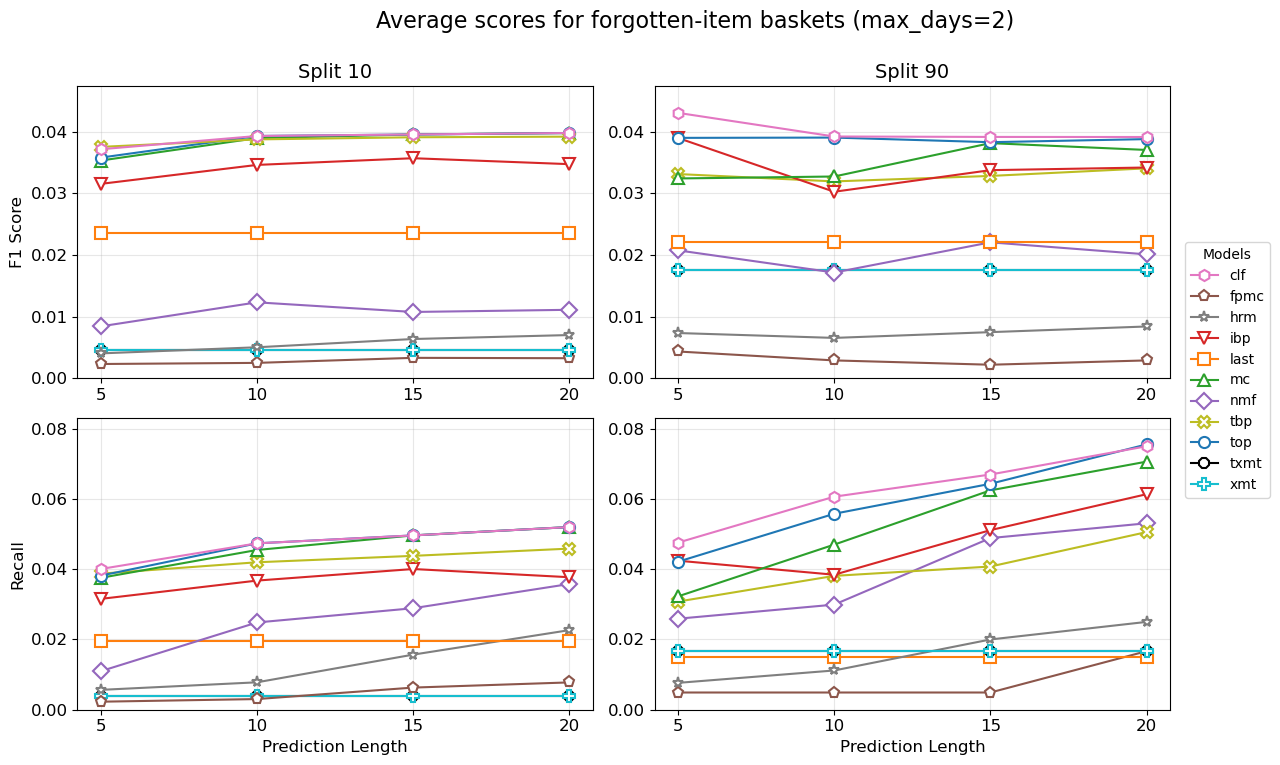

In [21]:

filtered_df = df[
    (df['pred_length'].isin([5, 10, 15, 20])) & 
    (df['split_type'].isin([10, 90]))
].sort_values(by=['model_name', 'pred_length', 'split_type']).reset_index(drop=True)

# filtered_df = df[
#     (df['pred_length'].isin([5, 10, 15, 20])) & 
#     (df['split_type'].isin([30, 50, 70])) &
#     (~df['model_name'].isin(['xmt', 'tars_xmt_final_sum']))
# ].sort_values(by=['model_name', 'pred_length', 'split_type']).reset_index(drop=True)

plot_metrics_by_day(filtered_df
                    , day=2
                    , metrics=['avg_f1_score','avg_recall']
                    , metric_labels=['F1 Score', 'Recall']
                    )

### Time averages

In [22]:
def aggregate_results(dataset_names: List[str], model_names: List[str], verbose: bool = True) -> None:
    """
    Aggregate results from experiment files and save to agg_results.csv
    
    Args:
        dataset_names: List of dataset names (e.g., ['coop', 'tafeng'])
        model_names: List of model names to process
        verbose: Whether to print progress information
    """
    
    # Initialize lists to store results
    results = []
    
    # Get the current working directory (where the notebook is)
    base_dir = Path.cwd()
    
    # Metrics to aggregate
    metrics = ['f1_score', 'precision', 'recall', 'hit_score']
    time_metrics = ['training_time', 'pred_time']
    
    for dataset in dataset_names:
        if verbose:
            print(f"\nProcessing dataset: {dataset}")
            
        dataset_path = base_dir / 'forgotten' / dataset
        if not dataset_path.exists():
            if verbose:
                print(f"Dataset directory not found: {dataset_path}")
            continue
            
        for model in model_names:
            if verbose:
                print(f"\n  Processing model: {model}")
                
            model_path = dataset_path / model
            if not model_path.exists():
                if verbose:
                    print(f"  Model directory not found: {model_path}")
                continue
                
            # Process each split (10 to 90)
            for split in range(10, 100, 10):
                if verbose:
                    print(f"    Processing split: {split}")
                    
                split_path = model_path / f'split_{split}'
                if not split_path.exists():
                    if verbose:
                        print(f"    Split directory not found: {split_path}")
                    continue
                    
                # Process each day folder (0, 1, 2)
                for day in range(3):
                    if verbose:
                        print(f"      Processing day: {day}")
                        
                    day_path = split_path / str(day)
                    if not day_path.exists():
                        if verbose:
                            print(f"      Day directory not found: {day_path}")
                        continue
                    
                    # Handle the 'last' model
                    if model == 'last':
                        file_name = f'pred_forgot_{split}_last_{day}_days.csv'
                        file_path = day_path / file_name
                        
                        if not file_path.exists():
                            if verbose:
                                print(f"        File not found: {file_name}")
                            continue
                            
                        try:
                            if verbose:
                                print(f"        Reading: {file_name}")
                                
                            # Read the CSV file
                            df = pd.read_csv(file_path)
                            
                            # Calculate the base metrics
                            base_metrics = {
                                'model_name': model,
                                'split_type': split,
                                'max_days': day,
                            }
                            
                            # Add average for each metric
                            for metric in metrics:
                                base_metrics[f'avg_{metric}'] = df[metric].mean()
                                
                            # Convert time strings to seconds and calculate averages
                            for time_metric in time_metrics:
                                # Convert time strings (HH:MM:SS.XXXXXX) to seconds
                                time_seconds = df[time_metric].apply(lambda x: sum(
                                    float(t) * m for t, m in zip(
                                        x.split(':')[::-1], 
                                        [1, 60, 3600]  # multipliers for seconds, minutes, hours
                                    )
                                ))
                                base_metrics[f'avg_{time_metric}_seconds'] = time_seconds.mean()
                            
                            # Create entries for each prediction length (2 to 20)
                            for pred_length in range(2, 21):
                                # Create a copy of the base metrics and add pred_length
                                metrics_entry = base_metrics.copy()
                                metrics_entry['pred_length'] = pred_length
                                results.append(metrics_entry)
                                
                        except Exception as e:
                            if verbose:
                                print(f"        Error processing {file_name}: {str(e)}")
                            continue
                            
                    else:
                        # Process each prediction length (2 to 20) for other models
                        for pred_length in range(2, 21):
                            file_name = f'pred_forgot_{split}_{model}_{day}_days_{pred_length}.csv'
                            file_path = day_path / file_name
                            
                            if not file_path.exists():
                                if verbose:
                                    print(f"        File not found: {file_name}")
                                continue
                                
                            try:
                                if verbose:
                                    print(f"        Reading: {file_name}")
                                    
                                # Read the CSV file
                                df = pd.read_csv(file_path)
                                
                                # Calculate averages for the metrics
                                avg_metrics = {
                                    'model_name': model,
                                    'split_type': split,
                                    'max_days': day,
                                    'pred_length': pred_length
                                }
                                
                                # Add average for each metric
                                for metric in metrics:
                                    avg_metrics[f'avg_{metric}'] = df[metric].mean()
                                
                                # Convert time strings to seconds and calculate averages
                                for time_metric in time_metrics:
                                    # Convert time strings (HH:MM:SS.XXXXXX) to seconds
                                    time_seconds = df[time_metric].apply(lambda x: sum(
                                        float(t) * m for t, m in zip(
                                            x.split(':')[::-1], 
                                            [1, 60, 3600]  # multipliers for seconds, minutes, hours
                                        )
                                    ))
                                    avg_metrics[f'avg_{time_metric}_seconds'] = time_seconds.mean()
                                    
                                results.append(avg_metrics)
                                
                            except Exception as e:
                                if verbose:
                                    print(f"        Error processing {file_name}: {str(e)}")
                                continue
    
    # Create the final DataFrame
    if results:
        final_df = pd.DataFrame(results)
        
        # Save to CSV
        output_path = base_dir / 'agg_time_results_fbp_tafeng.csv'
        final_df.to_csv(output_path, index=False)
        
        if verbose:
            print(f"\nResults successfully saved to: {output_path}")
            print(f"Total aggregated results: {len(results)}")
    else:
        print("No results were found to aggregate.")

# Example usage:
dataset_names = ['tafeng']
model_names = ['top', 'last', 'markov', 'ibp', 'nmf', 'fpmc', 'clf', 'hrm', 'tbp', 'xmt', 'tars_xmt_final_sum']
# model_names = ['top', 'last', 'markov', 'ibp', 'nmf', 'fpmc', 'clf', 'hrm', 'tbp']
# aggregate_results(dataset_names, model_names, verbose=True)